In [26]:
from db_helper import DBHelper
import datetime
import networkx as nx

In [27]:
MONTH_TAG="month"
YEAR_TAG="year"
DAY_TAG="day"

MONTHS = {1:"JAN",2:"FEB",3:"MAR",4:"APR",
          5:"MAY",6:"JUN",7:"JUL",8:"AUG",
         9:"SEP",10:"OCT",11:"NOV",12:"DEC"}

In [28]:
db = DBHelper()
db.connect(user="root",passwd="Hasan5695*",db="cse496")

In [30]:
tweets = db.getTweets("denemeShort")
tweets.sort(key=lambda t: t.date)

In [32]:
#Print first tweet
print("ExampleSentName:",tweets[0].sentName)
print("ExampleText:",tweets[0].text)
print("ExampleDate:",tweets[0].date)

ExampleSentName: osmancoskungazi
ExampleText: Hayat bu, bir bakarsın herşey bir anda son bulur.
 Hayat bu, son dediğin an herşey yeniden can bulur..Şemsi Tebrizi
ExampleDate: 2013-06-25 16:24:47


In [33]:
# Print sorted tweets
"""
for i in range(0,100):
    print("ExampleSentName:",tweets[i].sentName)
    print("ExampleText:",tweets[i].text)
    print("ExampleDate:",tweets[i].date)
    print("ExampleDateStr",tweets[i].dateStr)
"""


'\nfor i in range(0,100):\n    print("ExampleSentName:",tweets[i].sentName)\n    print("ExampleText:",tweets[i].text)\n    print("ExampleDate:",tweets[i].date)\n    print("ExampleDateStr",tweets[i].dateStr)\n'

In [34]:
G3 = nx.DiGraph()
G3.add_node(YEAR_TAG)
G3.add_node(MONTH_TAG)
G3.add_node(DAY_TAG)
#nx.draw(G,width=0.5,node_size=80,font_size=8,with_labels=True)

In [35]:
# Draw Graph According to Page3
#l=len(tweets)
for i in range(0,10000,1500):
    tweet = tweets[i]
    # connect Year edges
    G3.add_edge(tweet.date.year,MONTHS[tweet.date.month])
    G3.add_edge(tweet.date.year,YEAR_TAG)
    # connect month edges
    G3.add_edge(MONTHS[tweet.date.month],MONTH_TAG)
    G3.add_edge(MONTHS[tweet.date.month],tweet.date.day)
    # connect day edges
    G3.add_edge(tweet.date.day,DAY_TAG)

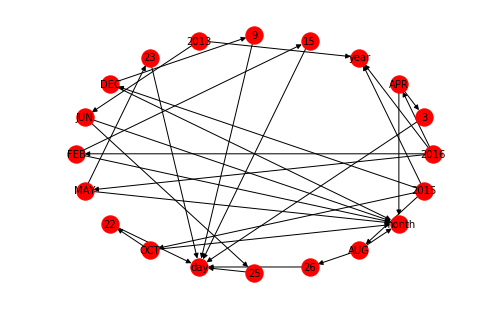

In [36]:
pos=nx.circular_layout(G3)
#nx.draw(G3,width=1,node_size=300,font_size=10,with_labels=True)
nx.draw(G3,pos,node_size=300,font_size=10,with_labels=True)

In [37]:
# Draw Graph According to Page1
G1 = nx.DiGraph()
G1.add_node(YEAR_TAG)
G1.add_node(MONTH_TAG)

In [39]:
prevYear = None
prevMonth = None

prevYear = tweets[0].date.year
prevMonth = tweets[0].date.month

# Get random sorted tweets and draw graph
for i in range(0,10000,1000):
    tweet = tweets[i]
    print(tweet.date.year," ",tweet.date.month," ",tweet.date.day)
            
    G1.add_edge(YEAR_TAG,tweet.date.year,weight=tweet.date.year)
    
    if(prevYear < tweet.date.year):
        G1.add_edge(prevYear,tweet.date.year)
        prevYear = tweet.date.year
        prevMonth = tweet.date.month
        
    monthFormat = "{month} {year}".format(month=MONTHS[tweet.date.month],year=tweet.date.year)
    if(prevMonth < tweet.date.month):
        prevMonthFormat = "{month} {year}".format(month=MONTHS[prevMonth],year=tweet.date.year)
        G1.add_edge(prevMonthFormat,monthFormat)
        prevMonth = tweet.date.month
    
    G1.add_edge(tweet.date.year,monthFormat)
    
    G1.add_edge(MONTH_TAG,monthFormat,month=tweet.date.month, year=tweet.date.year)

2013   6   25
2015   7   13
2015   9   19
2015   10   22
2015   11   17
2016   1   5
2016   2   15
2016   3   19
2016   4   15
2016   5   23


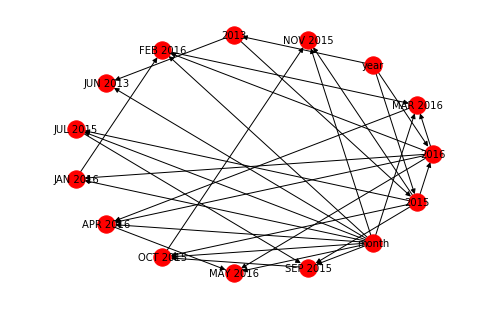

In [40]:
pos=nx.circular_layout(G1)
#nx.draw(G3,width=1,node_size=300,font_size=10,with_labels=True)
nx.draw(G1,pos,node_size=300,font_size=10,with_labels=True)